In [2]:
! pip install metocean_api cartopy
from metocean_api import ts
#from metocean_stats.stats import general_stats, dir_stats, extreme_stats, profile_stats
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt


In [3]:
# Define TimeSeries-object
df_ts = ts.TimeSeries(lon=3.73, lat=64.60,start_time='2020-01-01', end_time='2020-12-31' , product='NORA3_wind_wave')
#df_ts = ts.TimeSeries(lon=1.320, lat=53.324,start_time='2021-01-01', end_time='2021-01-15' , product='NORA3_wind_sub')
#df_ts = ts.TimeSeries(lon=1.320, lat=53.324,start_time='2021-01-01', end_time='2021-03-31' , product='NORA3_wave_sub')
#df_ts = ts.TimeSeries(lon=1.320, lat=53.324,start_time='2000-01-01', end_time='2001-03-31' , product='NORA3_stormsurge')
#df_ts = ts.TimeSeries(lon=1.320, lat=53.324,start_time='2021-01-01', end_time='2021-03-31' , product='NORA3_atm_sub')
#df_ts = ts.TimeSeries(lon=3.7, lat=61.8, start_time='2023-01-01', end_time='2023-02-01', product='NORA3_atm3hr_sub')

#%%
# Import data from thredds.met.no and save it as csv
df_ts.import_data(save_csv=True)
#print(df_ts.data)
# Load data from a local csv-file
df_ts.load_data(local_file=df_ts.datafile)
# %%



Directory  cache  Created 
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202001_NORA3wave_sub_time_unlimited.nc
Find nearest point to lon.=3.73,lat.=64.6
Found nearest: lon.=3.7520342,lat.=64.594376
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202002_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202003_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202004_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202005_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202006_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202007_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave/wave_tser/202008_NORA3wave_sub_time_unlimited.nc
https://thredds.met.no/thredds/dodsC/nora3_subset_wave

AttributeError: 'DataFrame' object has no attribute 'header'

<Axes: xlabel='time'>

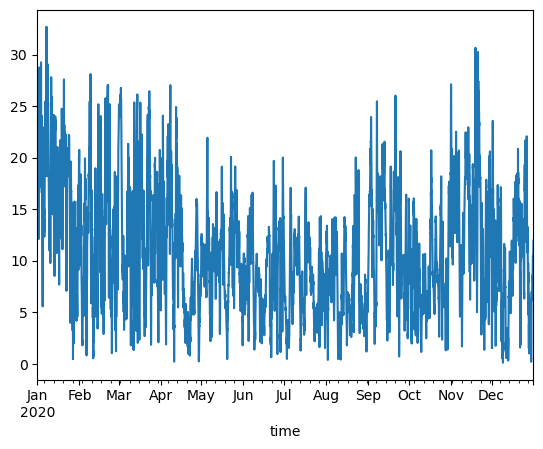

In [11]:
df_ts.data.wind_speed.plot()


In [12]:
np.corrcoef(df_ts.data.wind_speed_10m,df_ts.data.hs_swell)

array([[ 1.        , -0.04540449],
       [-0.04540449,  1.        ]])

In [13]:
pd.Series.autocorr(df_ts.data.wind_speed_10m)

0.9738284659273087

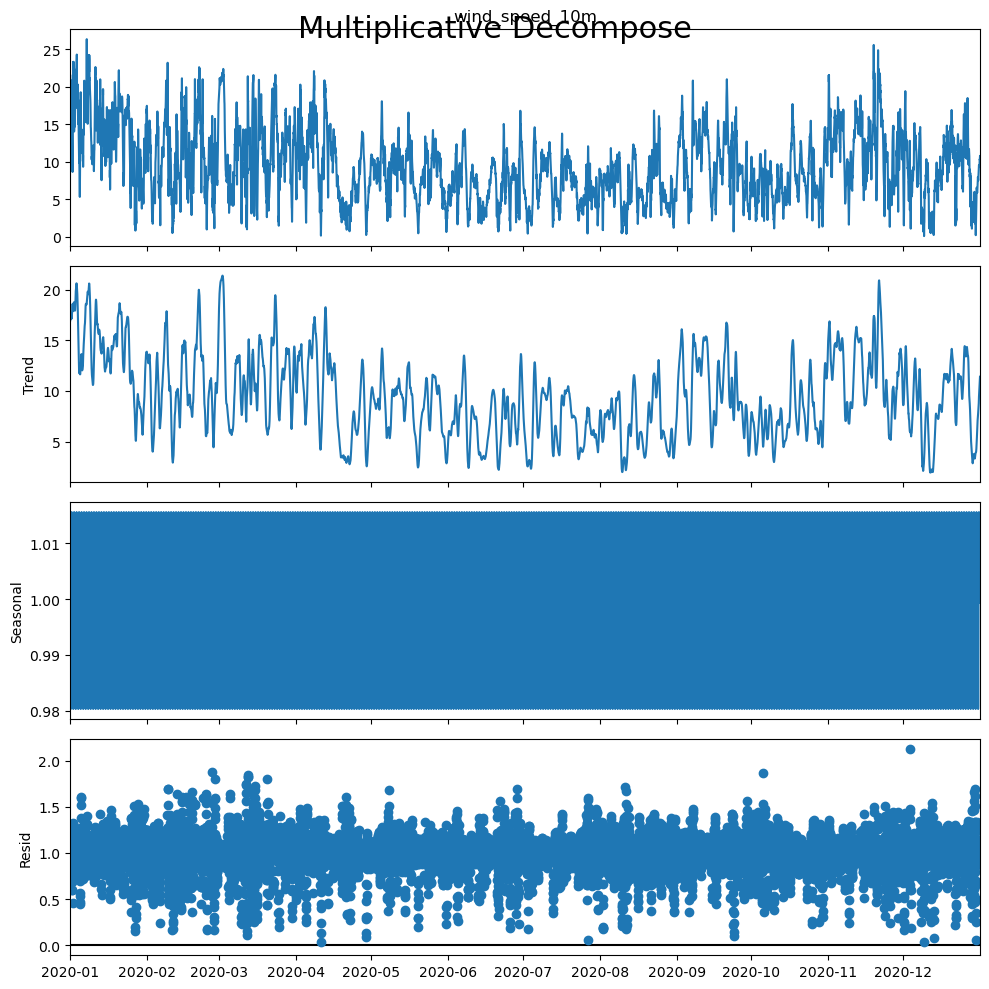

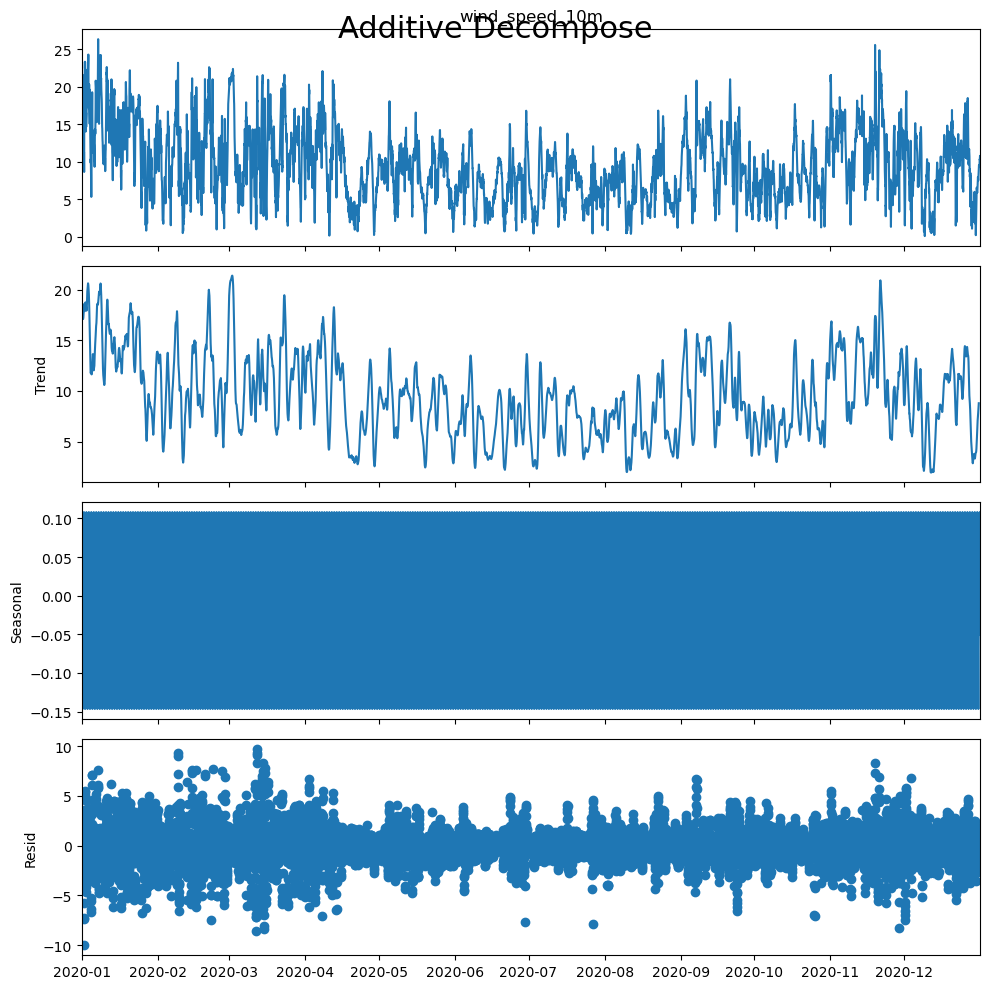

In [16]:
result_mul = seasonal_decompose(df_ts.data.wind_speed_10m, model='multiplicative', extrapolate_trend='freq')
result_add = seasonal_decompose(df_ts.data.wind_speed_10m, model='additive')#, extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [17]:
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import RecurrencePlot

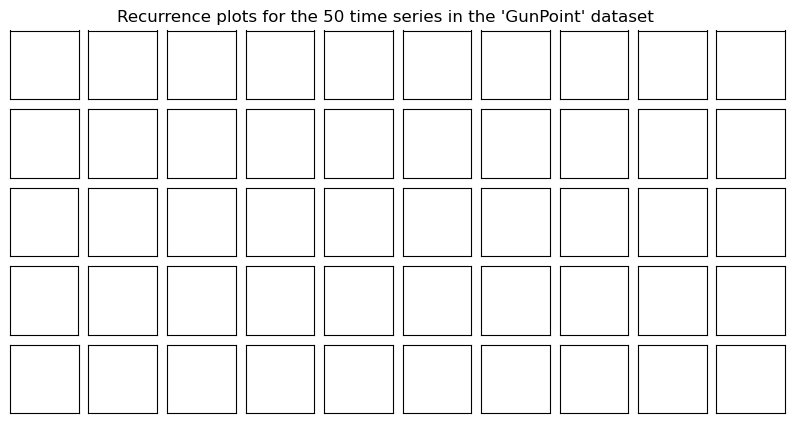

In [19]:
# Get the recurrence plots for all the time series
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(df_ts.data.wind_speed_10m.values.reshape(-1, 1))

# Plot the 50 recurrence plots
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True)
for i, ax in enumerate(grid):
    ax.imshow(X_rp[i], cmap='binary', origin='lower')
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])

fig.suptitle(
    "Recurrence plots for the 50 time series in the 'GunPoint' dataset",
    y=0.92
)

plt.show()

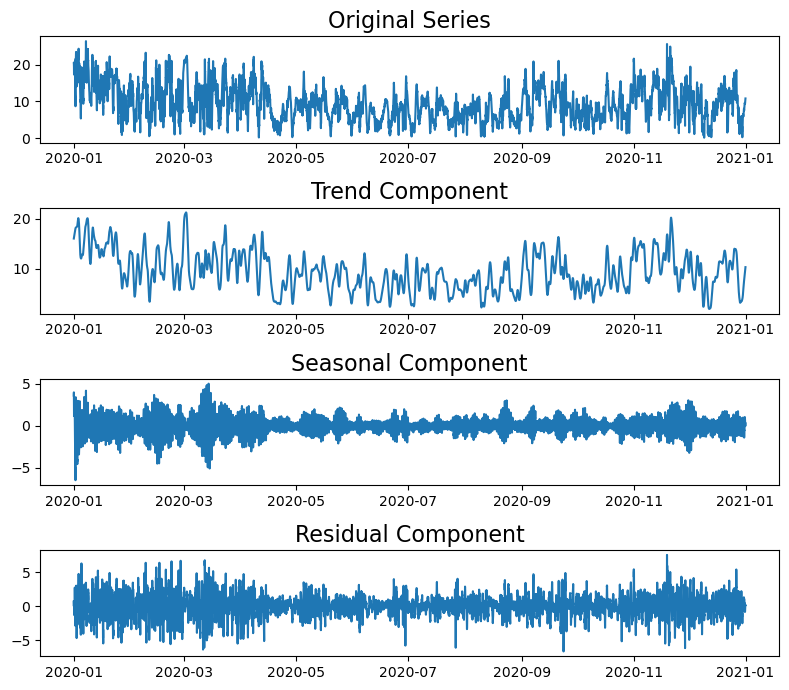

In [20]:
stl = STL(df_ts.data.wind_speed_10m)#, seasonal=13)
result = stl.fit()
# Plot the original time series and the decomposed components
plt.figure(figsize=(8,7))

plt.subplot(411)
plt.plot(result.observed)
plt.title('Original Series', fontsize=16)

plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend Component', fontsize=16)

plt.subplot(413)
plt.plot(result.seasonal)
plt.title('Seasonal Component', fontsize=16)

plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual Component', fontsize=16)

plt.tight_layout()
plt.show()